In [1]:
import sys
import os
sys.path.append('/Users/sam/All-Program/App/ObjectDetection/')

import logging
import numpy as np
from scipy import ndimage
from scipy import misc
from MaskRCNN.building_blocks import preprocess

logging.basicConfig(level=logging.DEBUG, filename="logfile.log", filemode="w",
                    format="%(asctime)-15s %(levelname)-8s %(message)s")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img_path = '/Users/sam/All-Program/App-DataSet/ObjectDetection/images/3627527276_6fe8cd9bfe_z.jpg'

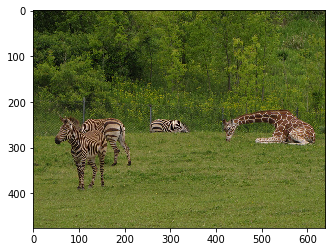

In [3]:
image = ndimage.imread(img_path, mode='RGB')
plt.imshow(np.array(image, dtype='uint8'))

## Preprocess Fetch Data

(476, 640, 3)
1.680672268907563
1.680672268907563
1.6
(1024, 1024, 3)
(1, 1024, 1024, 3)
(1, 13)
(1, 4)


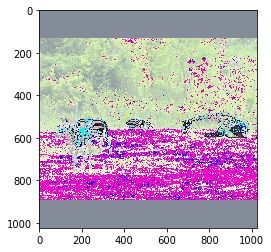

In [4]:
image_id = os.path.basename(img_path).split('.')[0]
transformed_images, image_metas, img_windows  = preprocess.process_images([image], [image_id])
print (transformed_images.shape)
print (image_metas.shape)
print (img_windows.shape)
plt.imshow(np.array(transformed_images[0], dtype='uint8'))

## RUN THE FPN Graph and collect output feature maps

In [5]:
import tensorflow as tf
import numpy as np
from MaskRCNN.building_blocks.main import inference
from MaskRCNN.building_blocks.load_params import set_pretrained_weights

def main(pretrained_weights_path):
    print('')
    inference_graph = inference()
    
    feed_dict = {inference_graph['xIN']: transformed_images}
    init = tf.global_variables_initializer()
    
    with tf.Session() as sess:
        sess.run(init)

        # Note setting the weight can take 1-2 min due to the deep network
        set_pretrained_weights(sess, pretrained_weights_path)
        
        c2, c3, c4, c5, p2, p3, p4, p5 = sess.run([inference_graph['fpn_C2'], inference_graph['fpn_C3'],
                                                    inference_graph['fpn_C4'], inference_graph['fpn_C5'],
                                                    inference_graph['fpn_P2'], inference_graph['fpn_P3'],
                                                    inference_graph['fpn_P4'], inference_graph['fpn_P5']
                                                  ], feed_dict=feed_dict)
        
        print(c2.shape, c3.shape, c4.shape, c5.shape, p2.shape, p3.shape, p4.shape, p5.shape)
    return c2, c3, c4, c5, p2, p3, p4, p5

Using TensorFlow backend.



Gathering Data
(?, ?) (?, ?) (?, ?) (?, ?)
FPN P2=(2, 256, 256, 256), P3=(2, 128, 128, 256), P4=(2, 64, 64, 256), P5=(2, 32, 32, 256), P6=(2, 16, 16, 256)
RPN: rpn_class_score=(2, 196608, 2), rpn_bbox=(2, 196608, 4) 
RPN: rpn_class_score=(2, 49152, 2), rpn_bbox=(2, 49152, 4) 
RPN: rpn_class_score=(2, 12288, 2), rpn_bbox=(2, 12288, 4) 
RPN: rpn_class_score=(2, 3072, 2), rpn_bbox=(2, 3072, 4) 
RPN: rpn_class_score=(2, 768, 2), rpn_bbox=(2, 768, 4) 
RPN Total(stacked): rpn_class_score=(2, 261888, 2), rpn_bbox=(2, 261888, 4) 


InvalidArgumentError: ConcatOp : Dimensions of inputs should match: shape[0] = [1,4,4] vs. shape[1] = [1,3,4]
	 [[Node: concat_boxes = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](nms_0, nms_1, range_1/start)]]

Caused by op 'concat_boxes', defined at:
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2698, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2802, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2862, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-5-3ba3b246705c>", line 3, in <module>
    from MaskRCNN.building_blocks.main import inference
  File "<frozen importlib._bootstrap>", line 968, in _find_and_load
  File "<frozen importlib._bootstrap>", line 957, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 673, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 697, in exec_module
  File "<frozen importlib._bootstrap>", line 222, in _call_with_frames_removed
  File "/Users/sam/All-Program/App/ObjectDetection/MaskRCNN/building_blocks/main.py", line 115, in <module>
    main(filepath)
  File "/Users/sam/All-Program/App/ObjectDetection/MaskRCNN/building_blocks/main.py", line 48, in main
    input_comp_graph, fpn_comp_graph, rpn_comp_graph, proposal_graph = inference(batch_size)
  File "/Users/sam/All-Program/App/ObjectDetection/MaskRCNN/building_blocks/main.py", line 34, in inference
    proposal_graph = Proposals(conf, inference_batch_size=inference_batch_size).get_proposal_graph()
  File "/Users/sam/All-Program/App/ObjectDetection/MaskRCNN/building_blocks/proposals_tf.py", line 46, in __init__
    self.build()
  File "/Users/sam/All-Program/App/ObjectDetection/MaskRCNN/building_blocks/proposals_tf.py", line 104, in build
    ) for num in range(0, self.inference_batch_size)], axis=0, name='concat_boxes'
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tensorflow/python/ops/array_ops.py", line 1099, in concat
    return gen_array_ops._concat_v2(values=values, axis=axis, name=name)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tensorflow/python/ops/gen_array_ops.py", line 706, in _concat_v2
    "ConcatV2", values=values, axis=axis, name=name)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2956, in create_op
    op_def=op_def)
  File "/Users/sam/App-Setup/anaconda/envs/anaconda35/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1470, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

InvalidArgumentError (see above for traceback): ConcatOp : Dimensions of inputs should match: shape[0] = [1,4,4] vs. shape[1] = [1,3,4]
	 [[Node: concat_boxes = ConcatV2[N=2, T=DT_FLOAT, Tidx=DT_INT32, _device="/job:localhost/replica:0/task:0/device:CPU:0"](nms_0, nms_1, range_1/start)]]


In [6]:
filepath = '/Users/sam/All-Program/App-DataSet/ObjectDetection/MaskRCNN/mask_rcnn_coco.h5'
fmap_c2, fmap_c3, fmap_c4, fmap_c5, fmap_p2, fmap_p3, fmap_p4, fmap_p5 = main(filepath)


(1, 256, 256, 256) (1, 128, 128, 512) (1, 64, 64, 1024) (1, 32, 32, 2048) (1, 256, 256, 256) (1, 128, 128, 256) (1, 64, 64, 256) (1, 32, 32, 256)


In [45]:
def vizualize(imageArray, title_arr, data_type, rows, columns, figsize=(40, 6)):
    fig1, axs = plt.subplots(rows,columns, figsize=figsize, facecolor='y', edgecolor='k')
    if columns>1:
        axs = axs.ravel()
    for no,image in enumerate(imageArray):
        axs[no].imshow(np.array(image.reshape(image.shape[0], image.shape[1]), dtype=data_type))

## fmap_c2

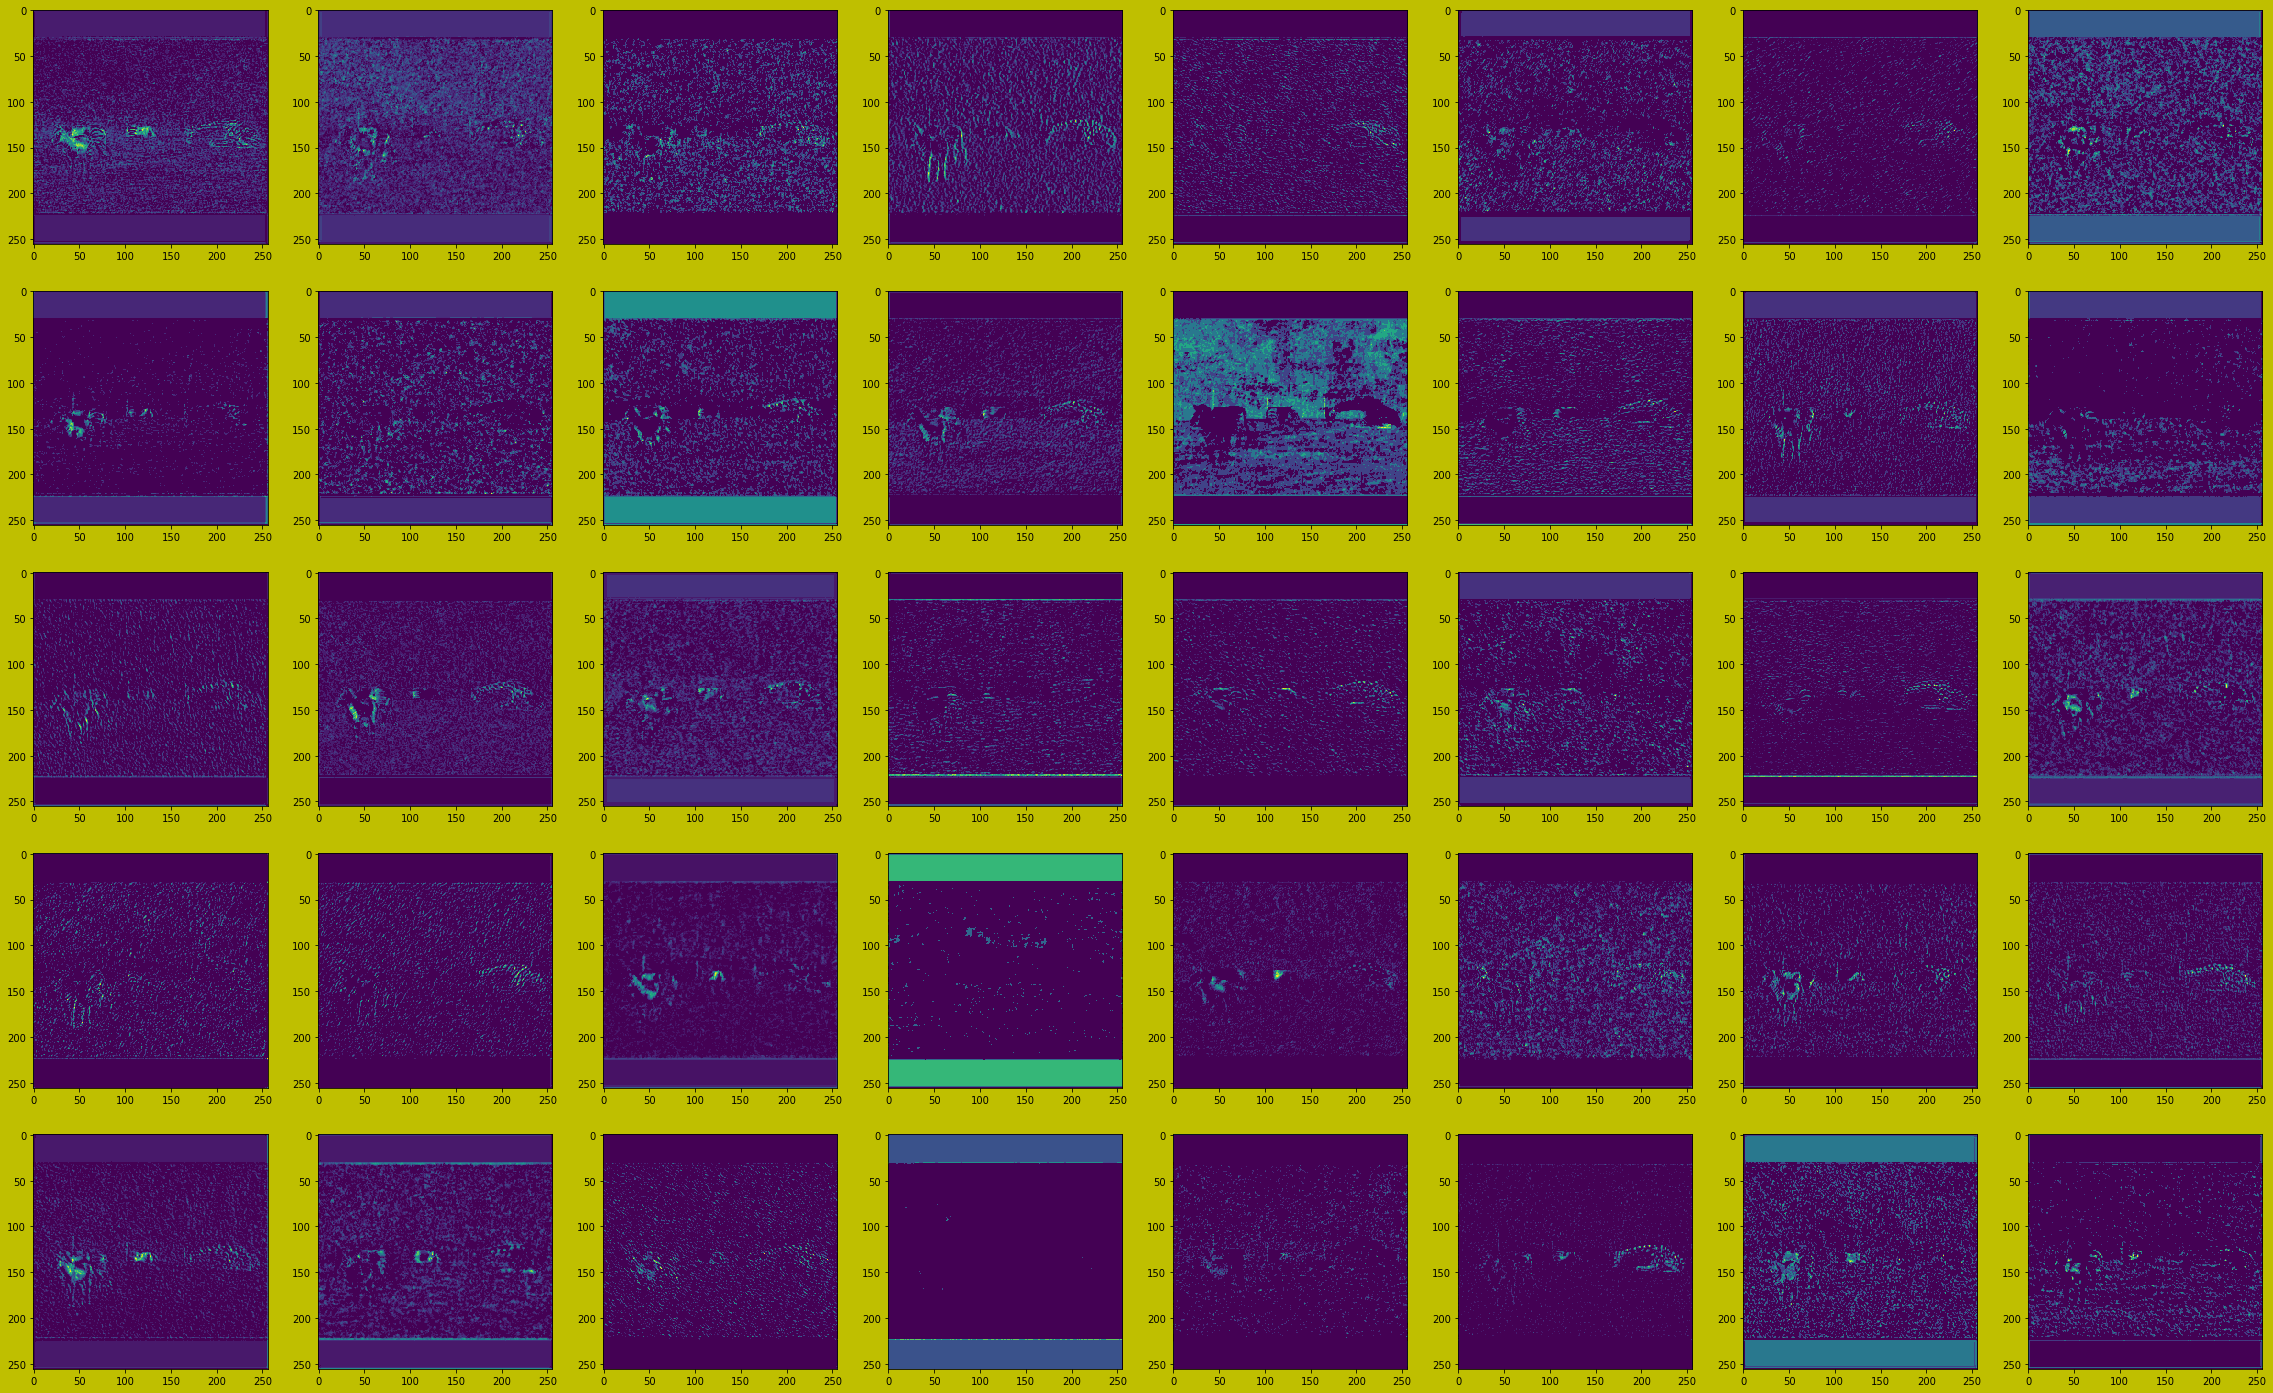

In [49]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [256, 256]
feature_maps = np.dsplit(fmap_c2[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_c3

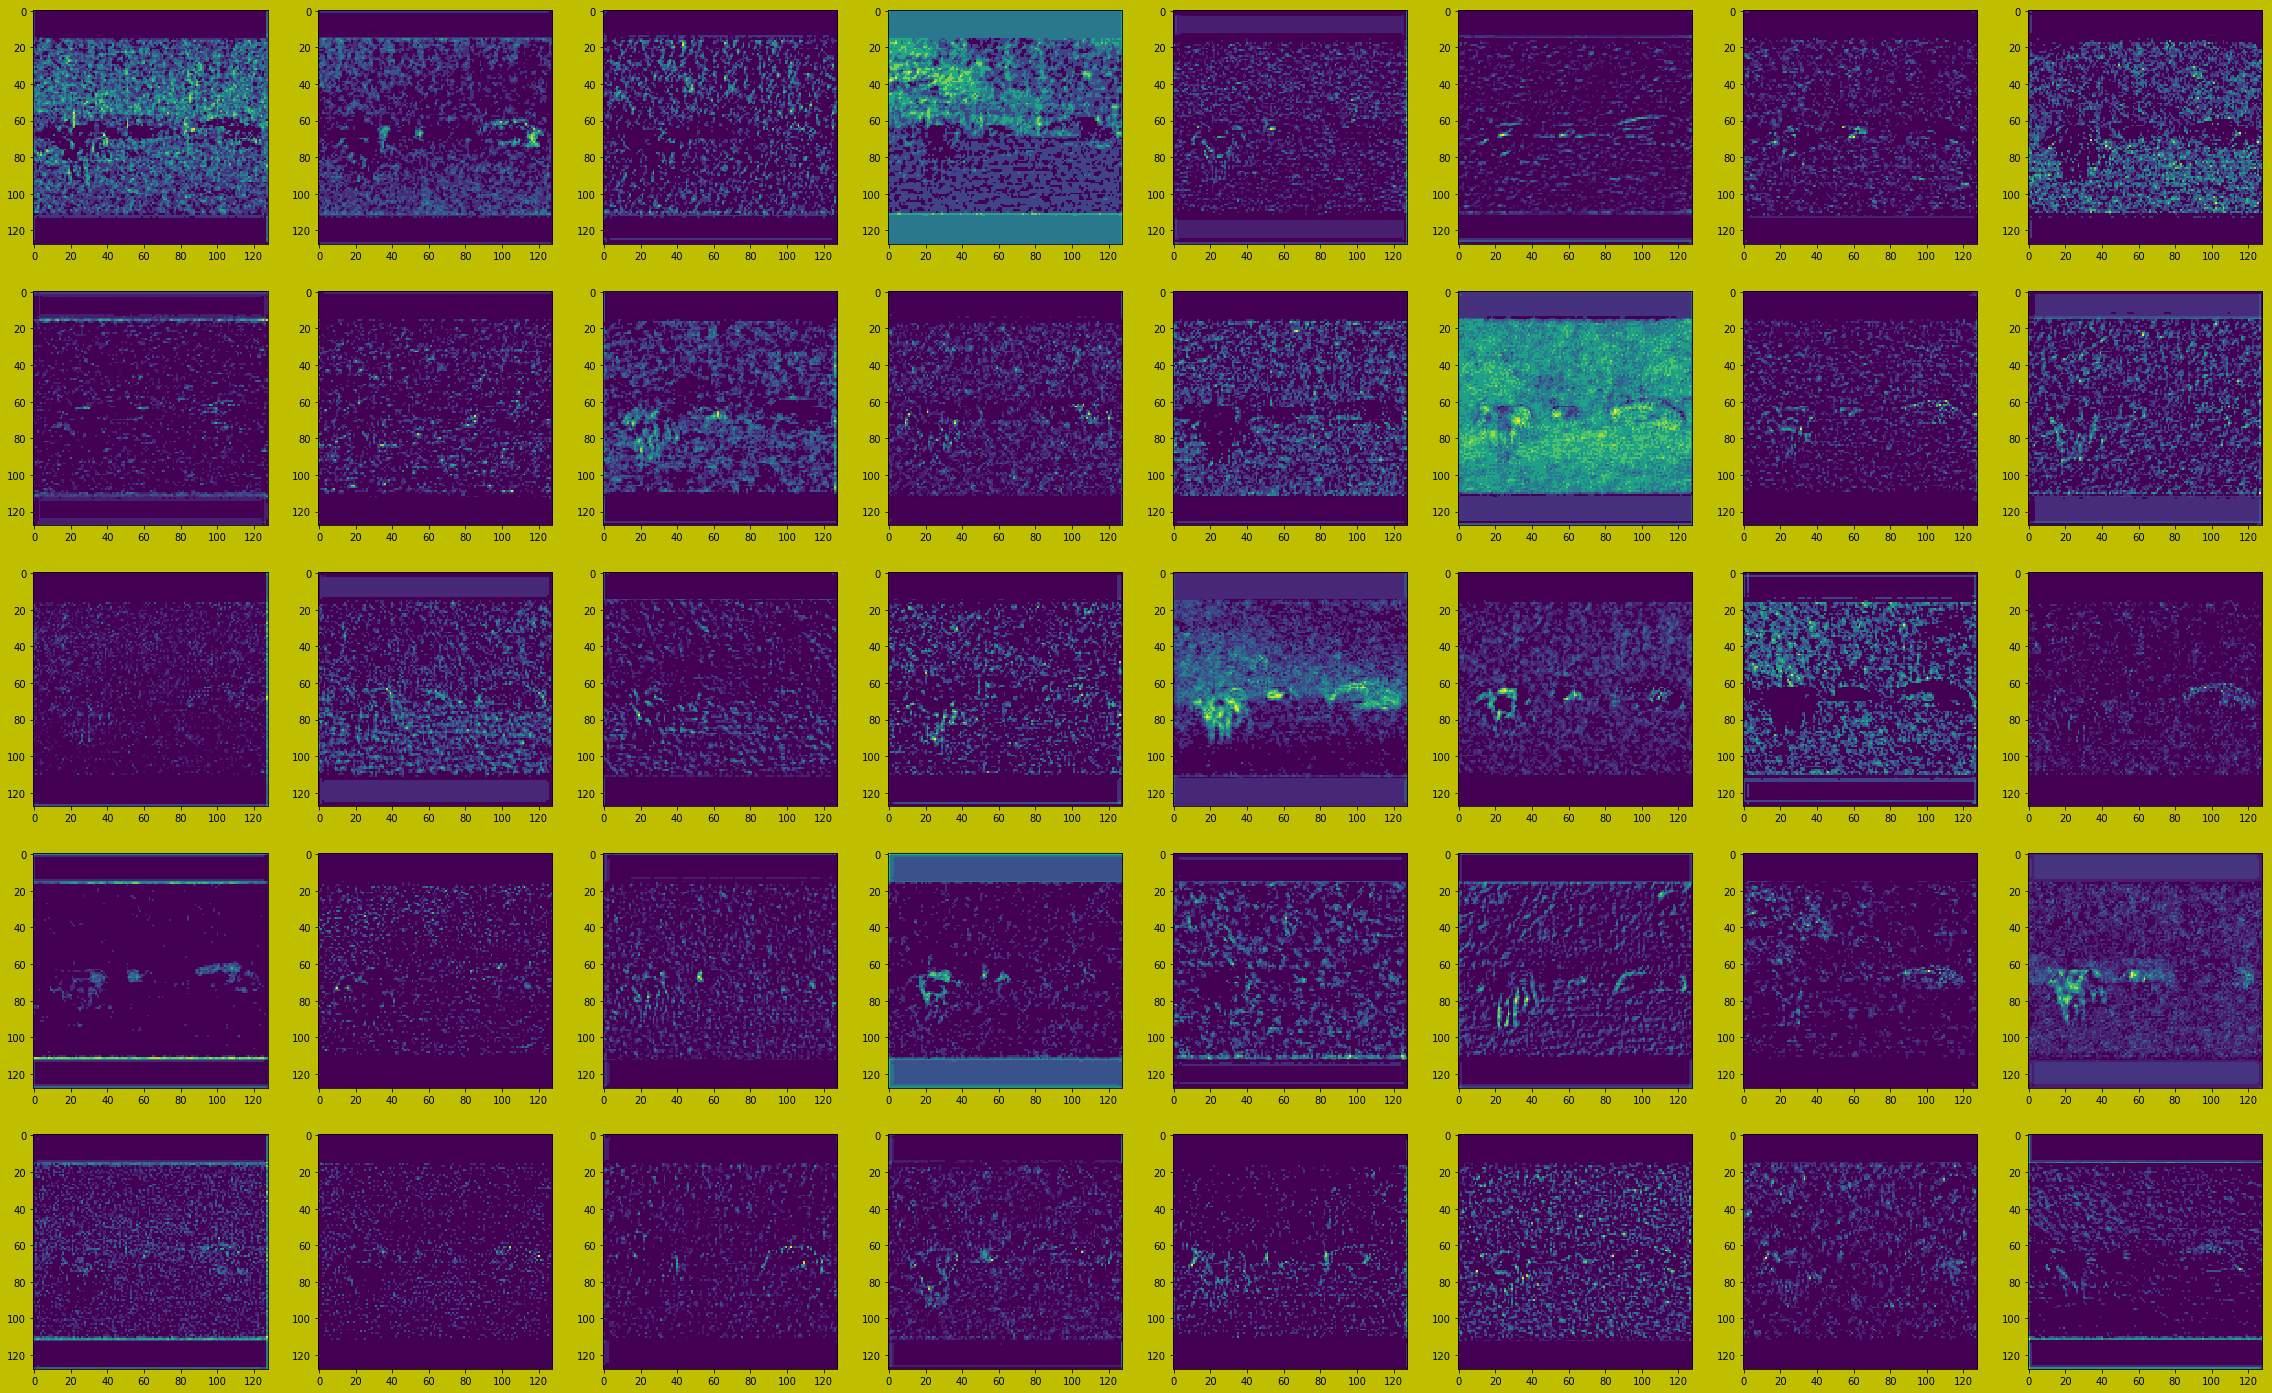

In [50]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [128, 128]
feature_maps = np.dsplit(fmap_c3[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_c4

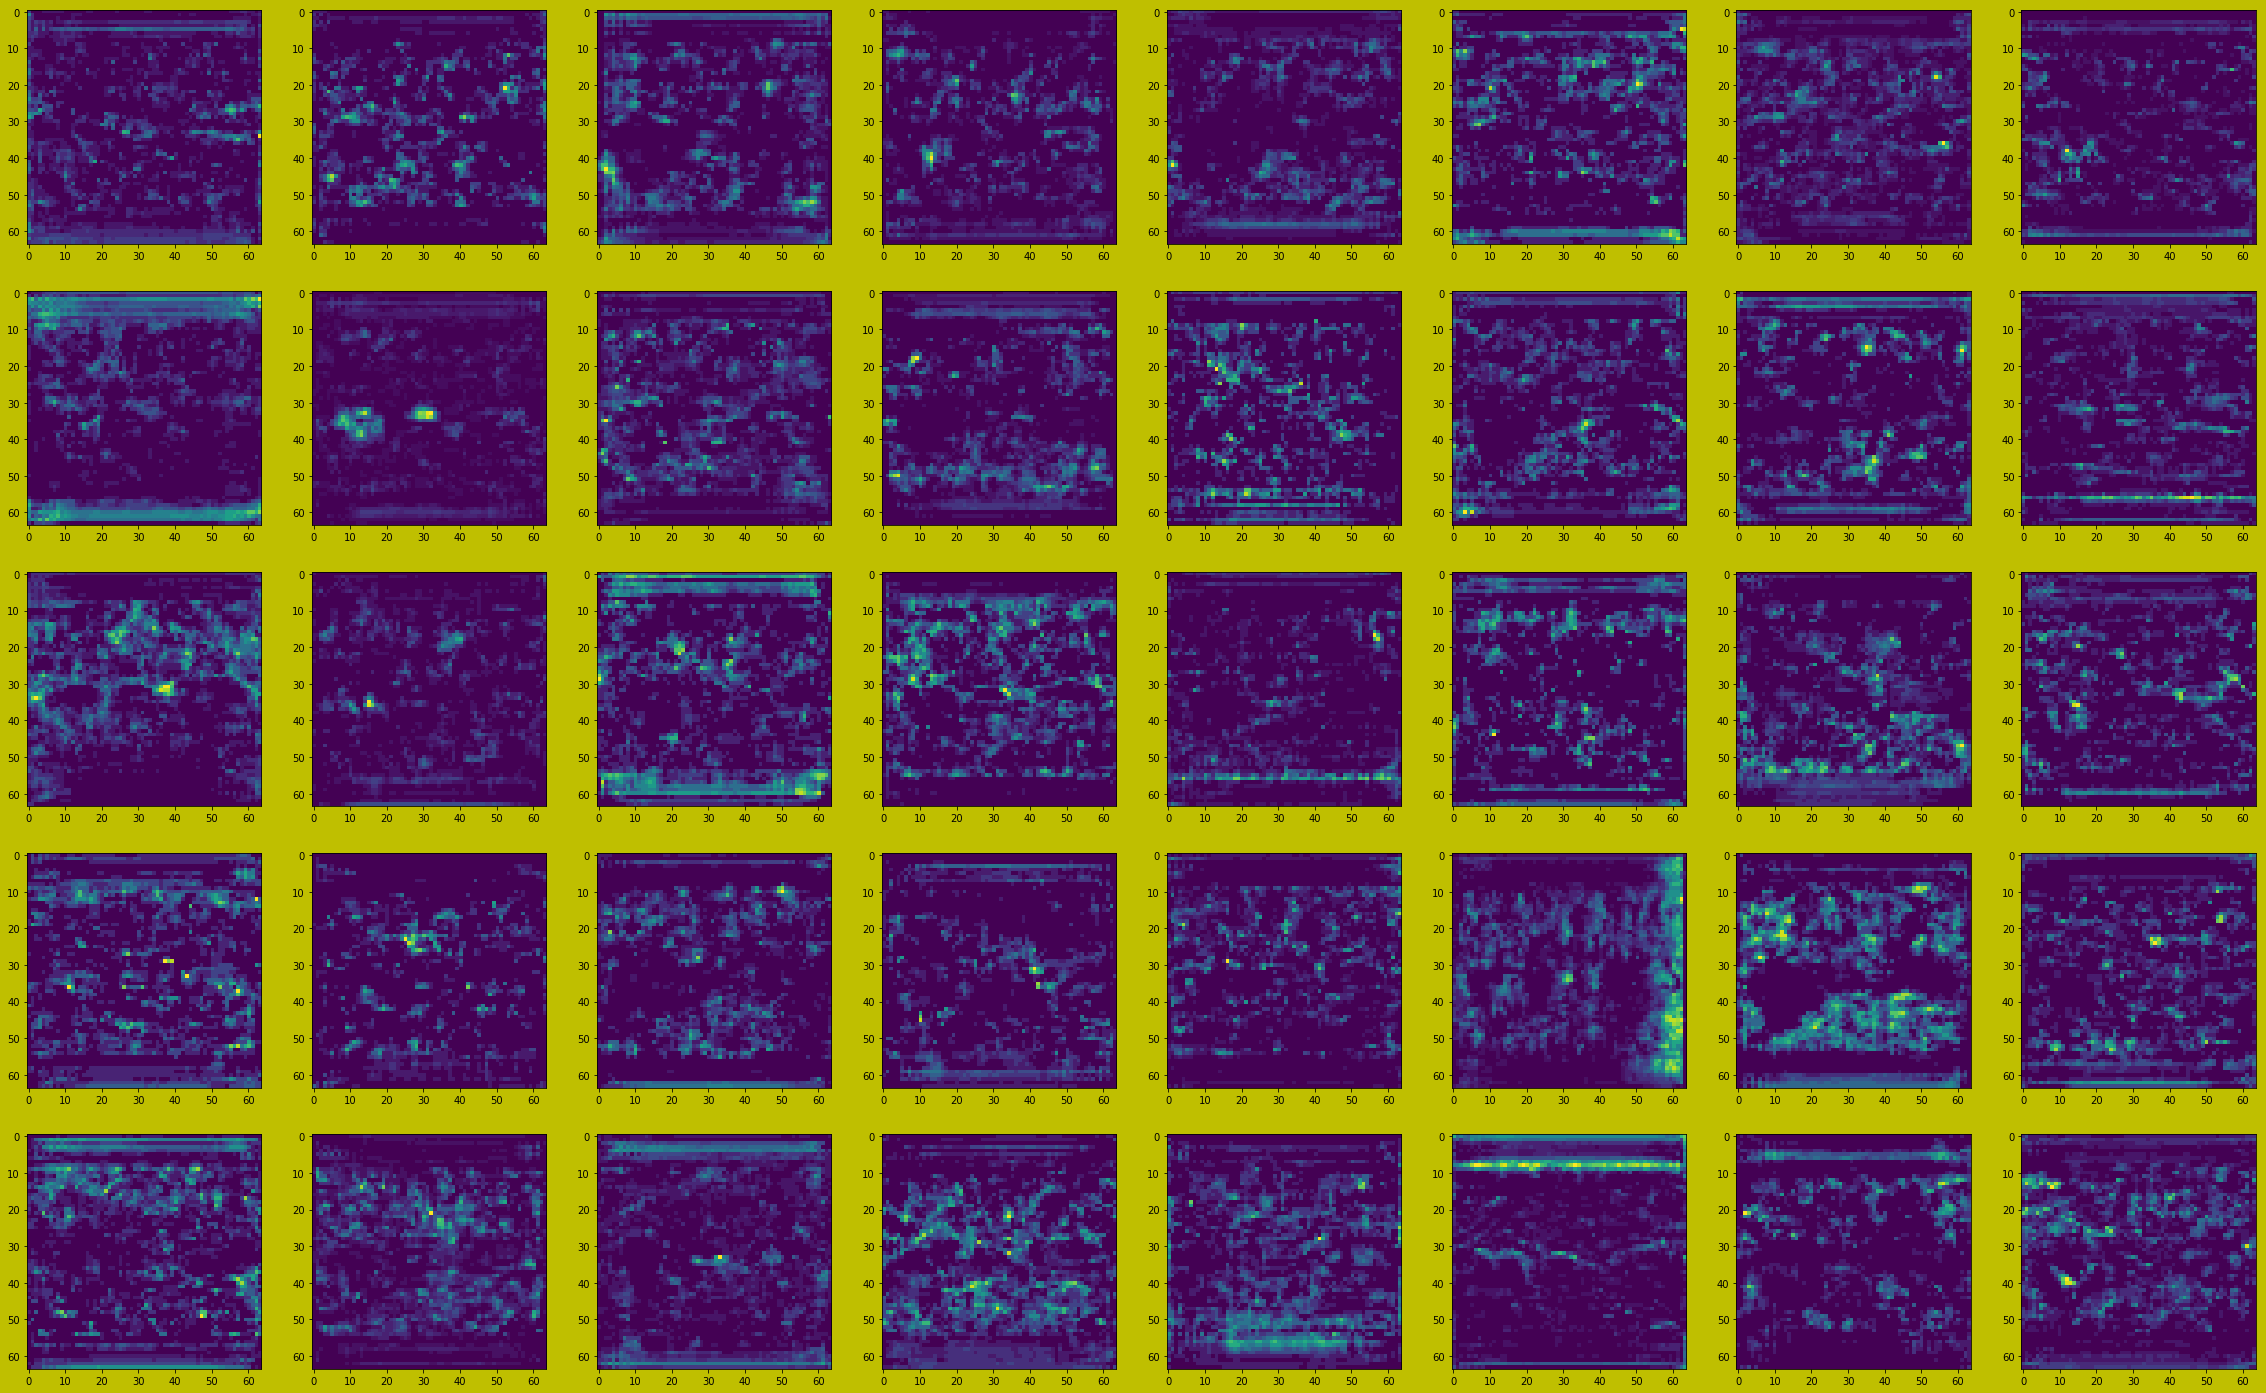

In [51]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [64,64]
feature_maps = np.dsplit(fmap_c4[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_c5

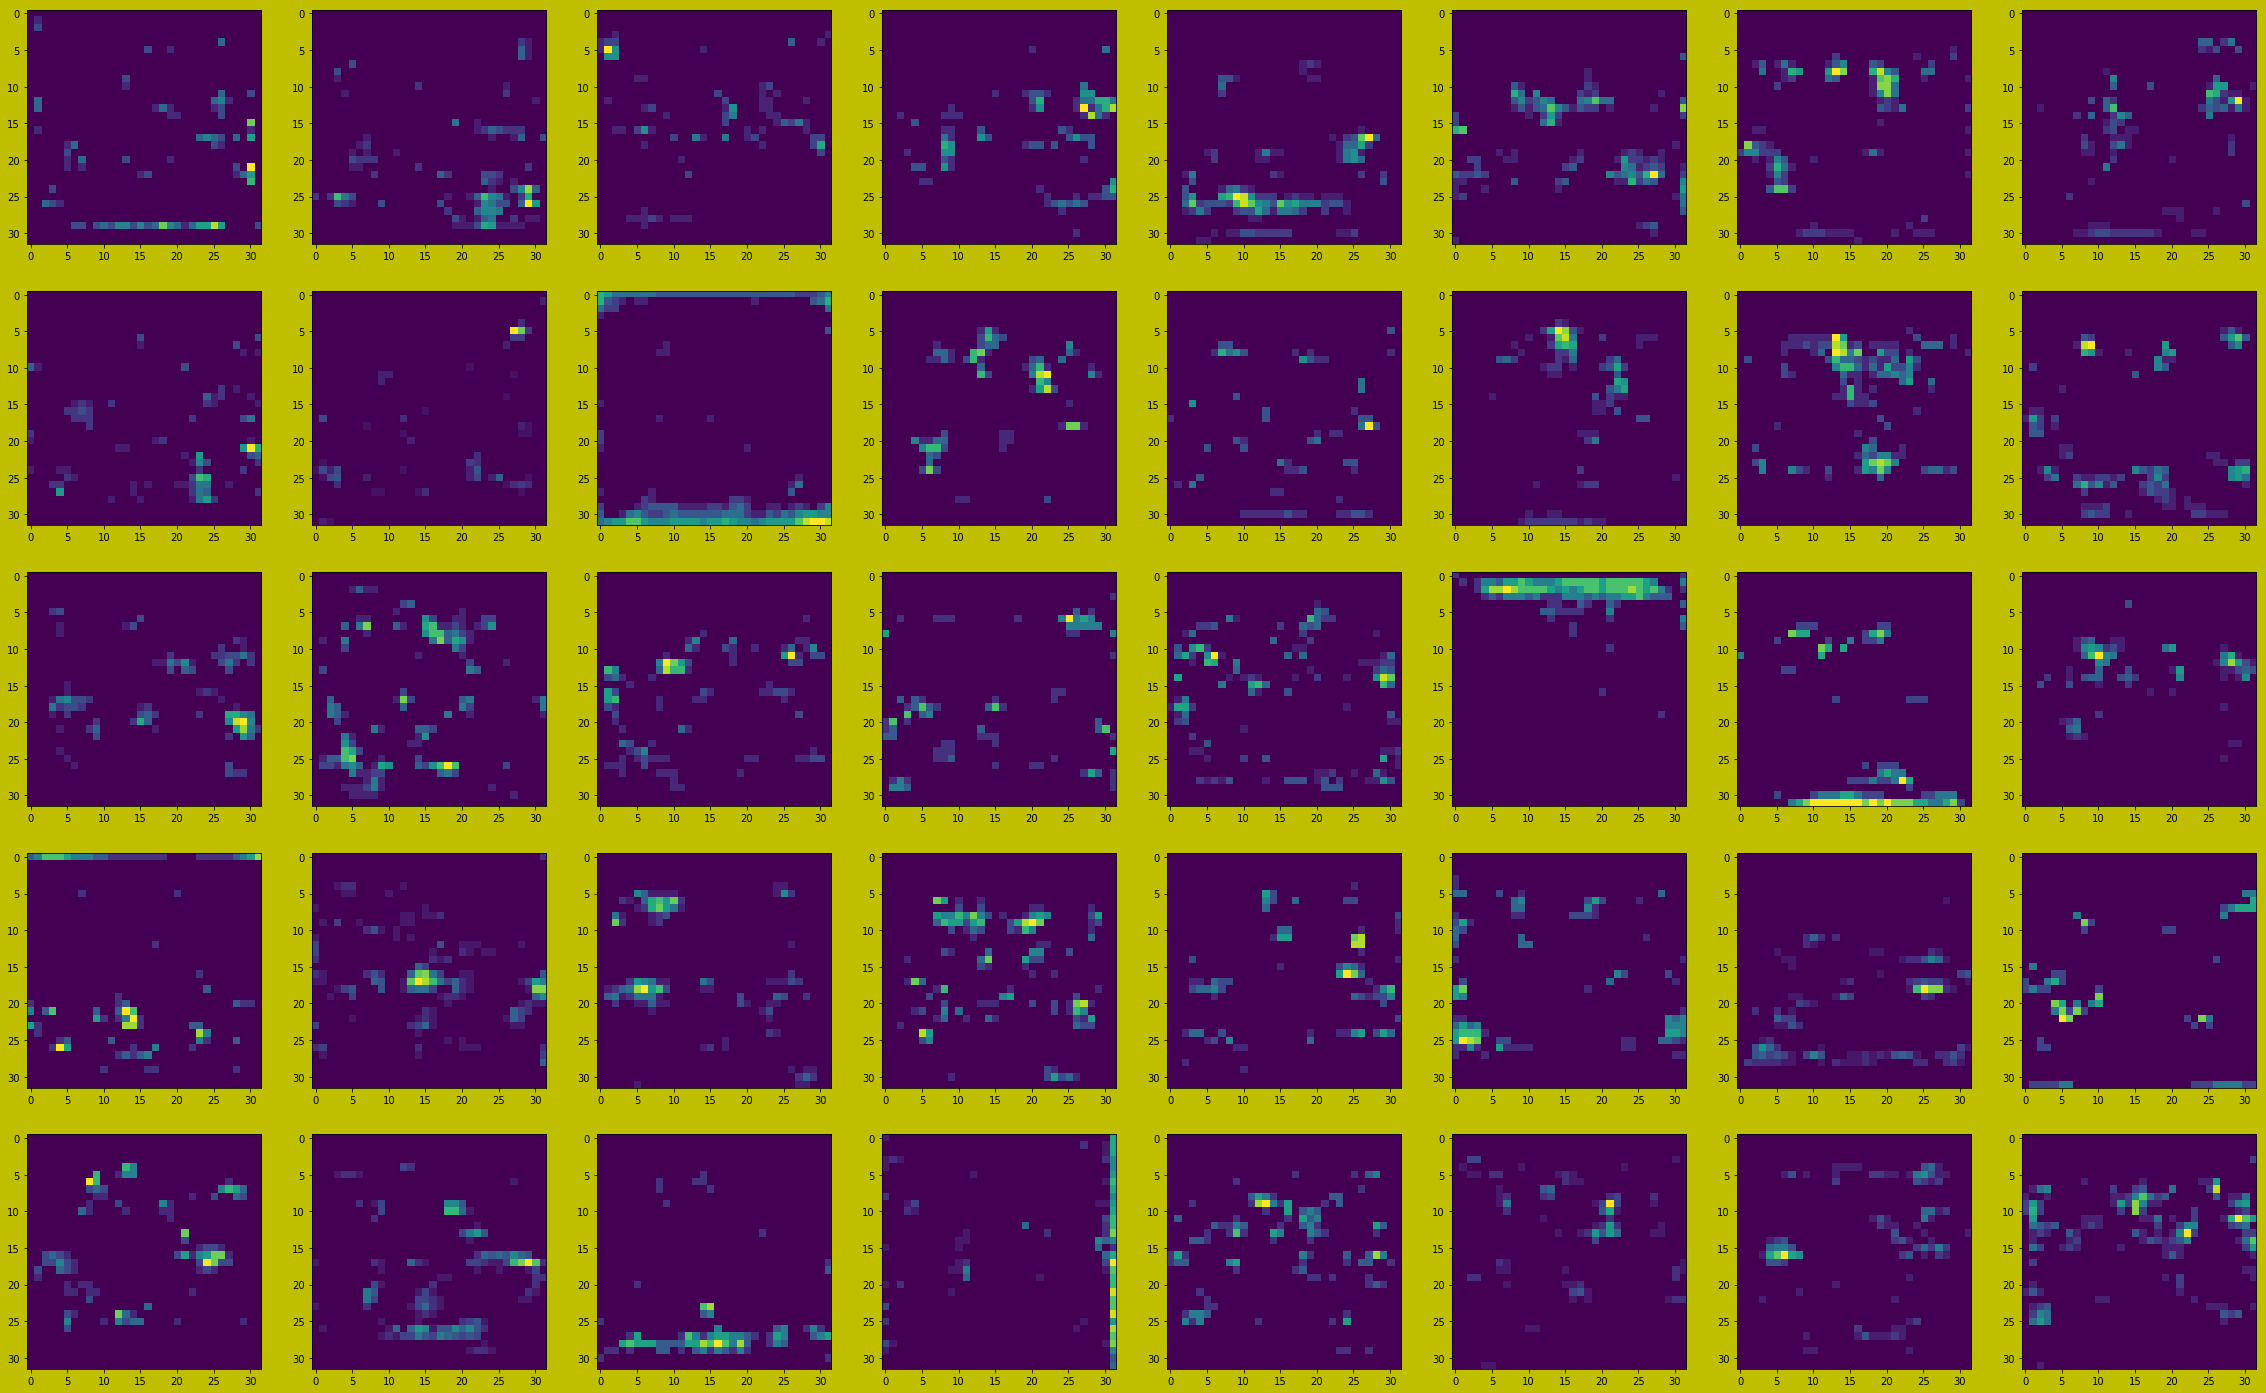

In [52]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [32,32]
feature_maps = np.dsplit(fmap_c5[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_p2

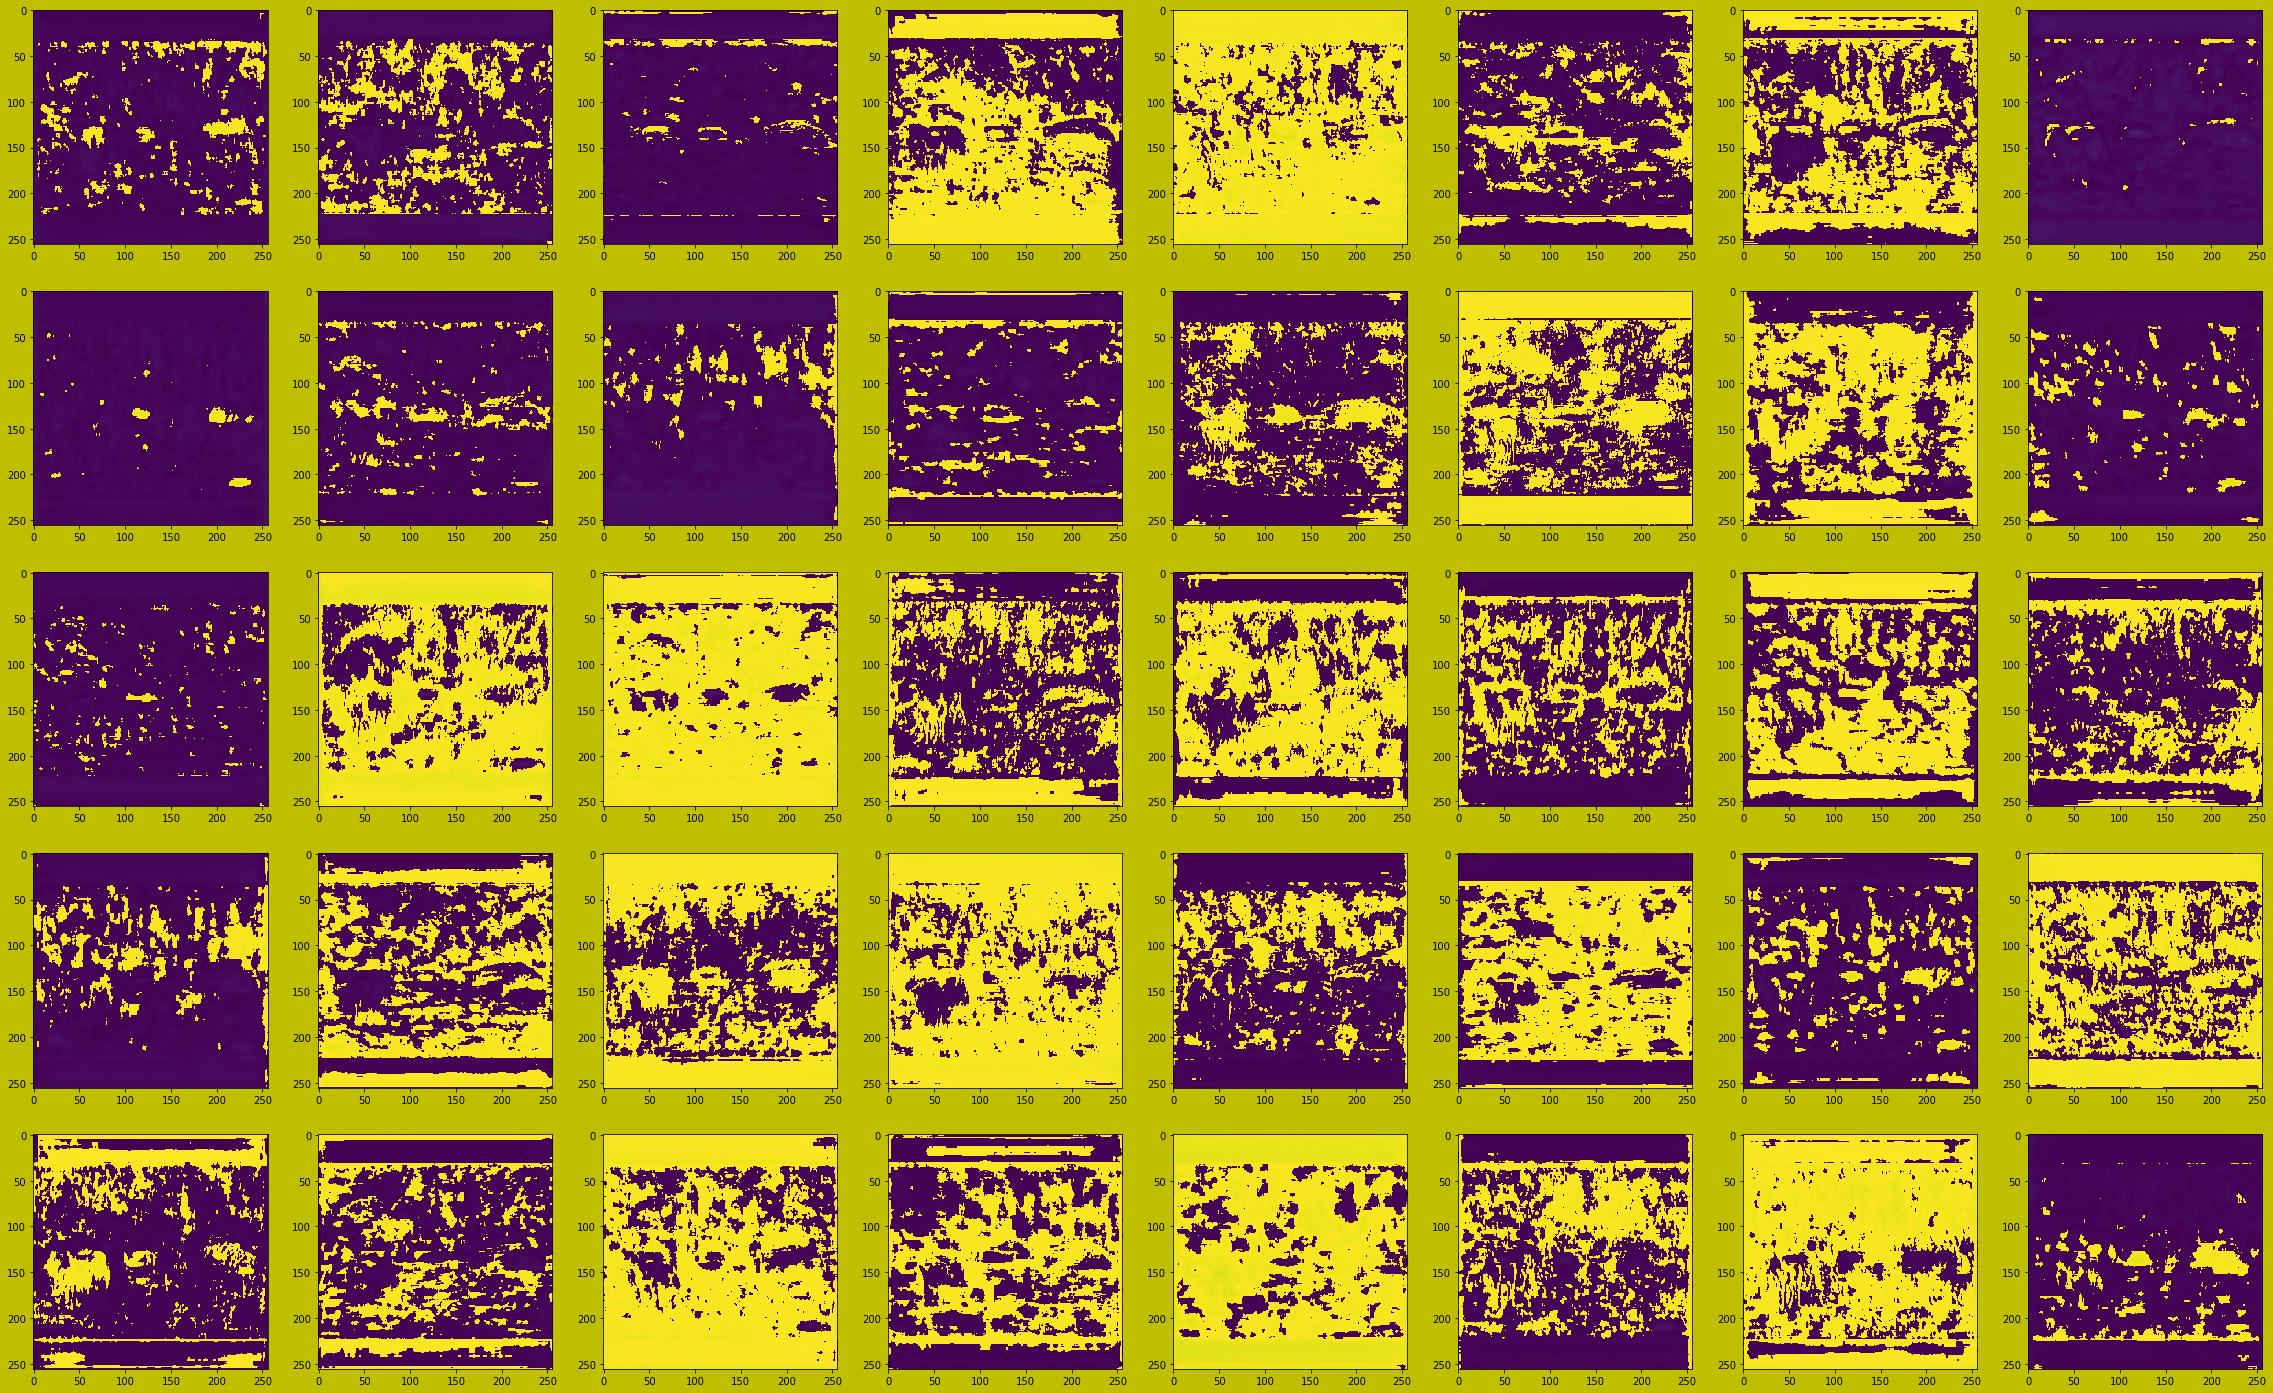

In [53]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [256, 256]
feature_maps = np.dsplit(fmap_p2[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_p3

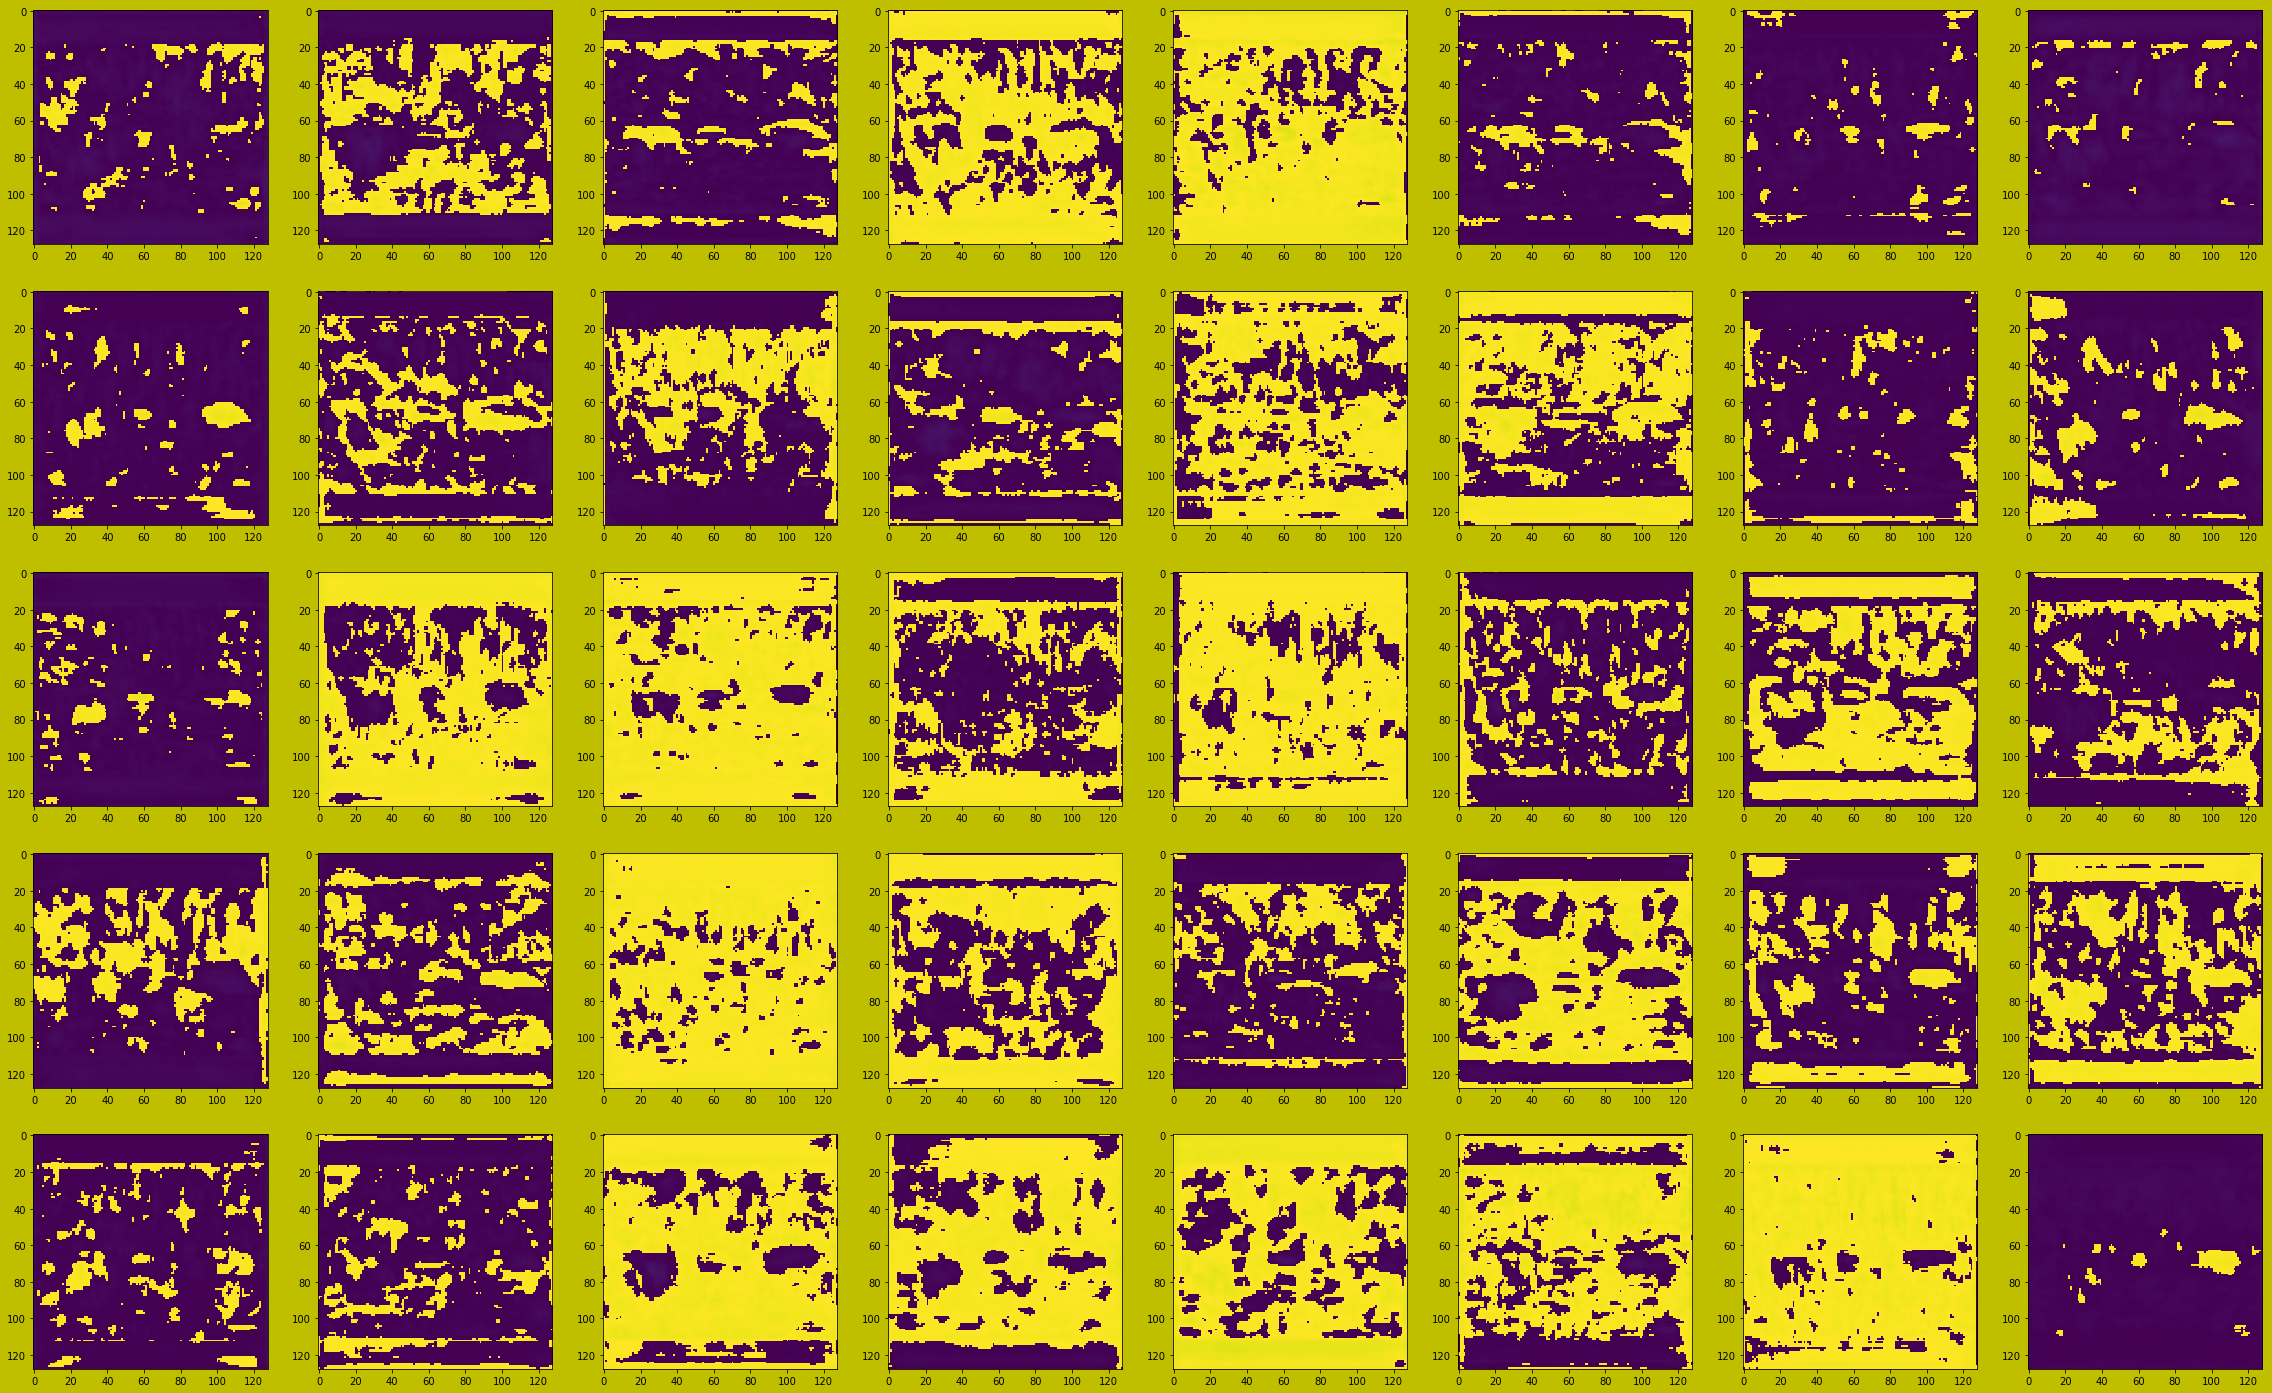

In [54]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [128, 128]
feature_maps = np.dsplit(fmap_p3[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_p4

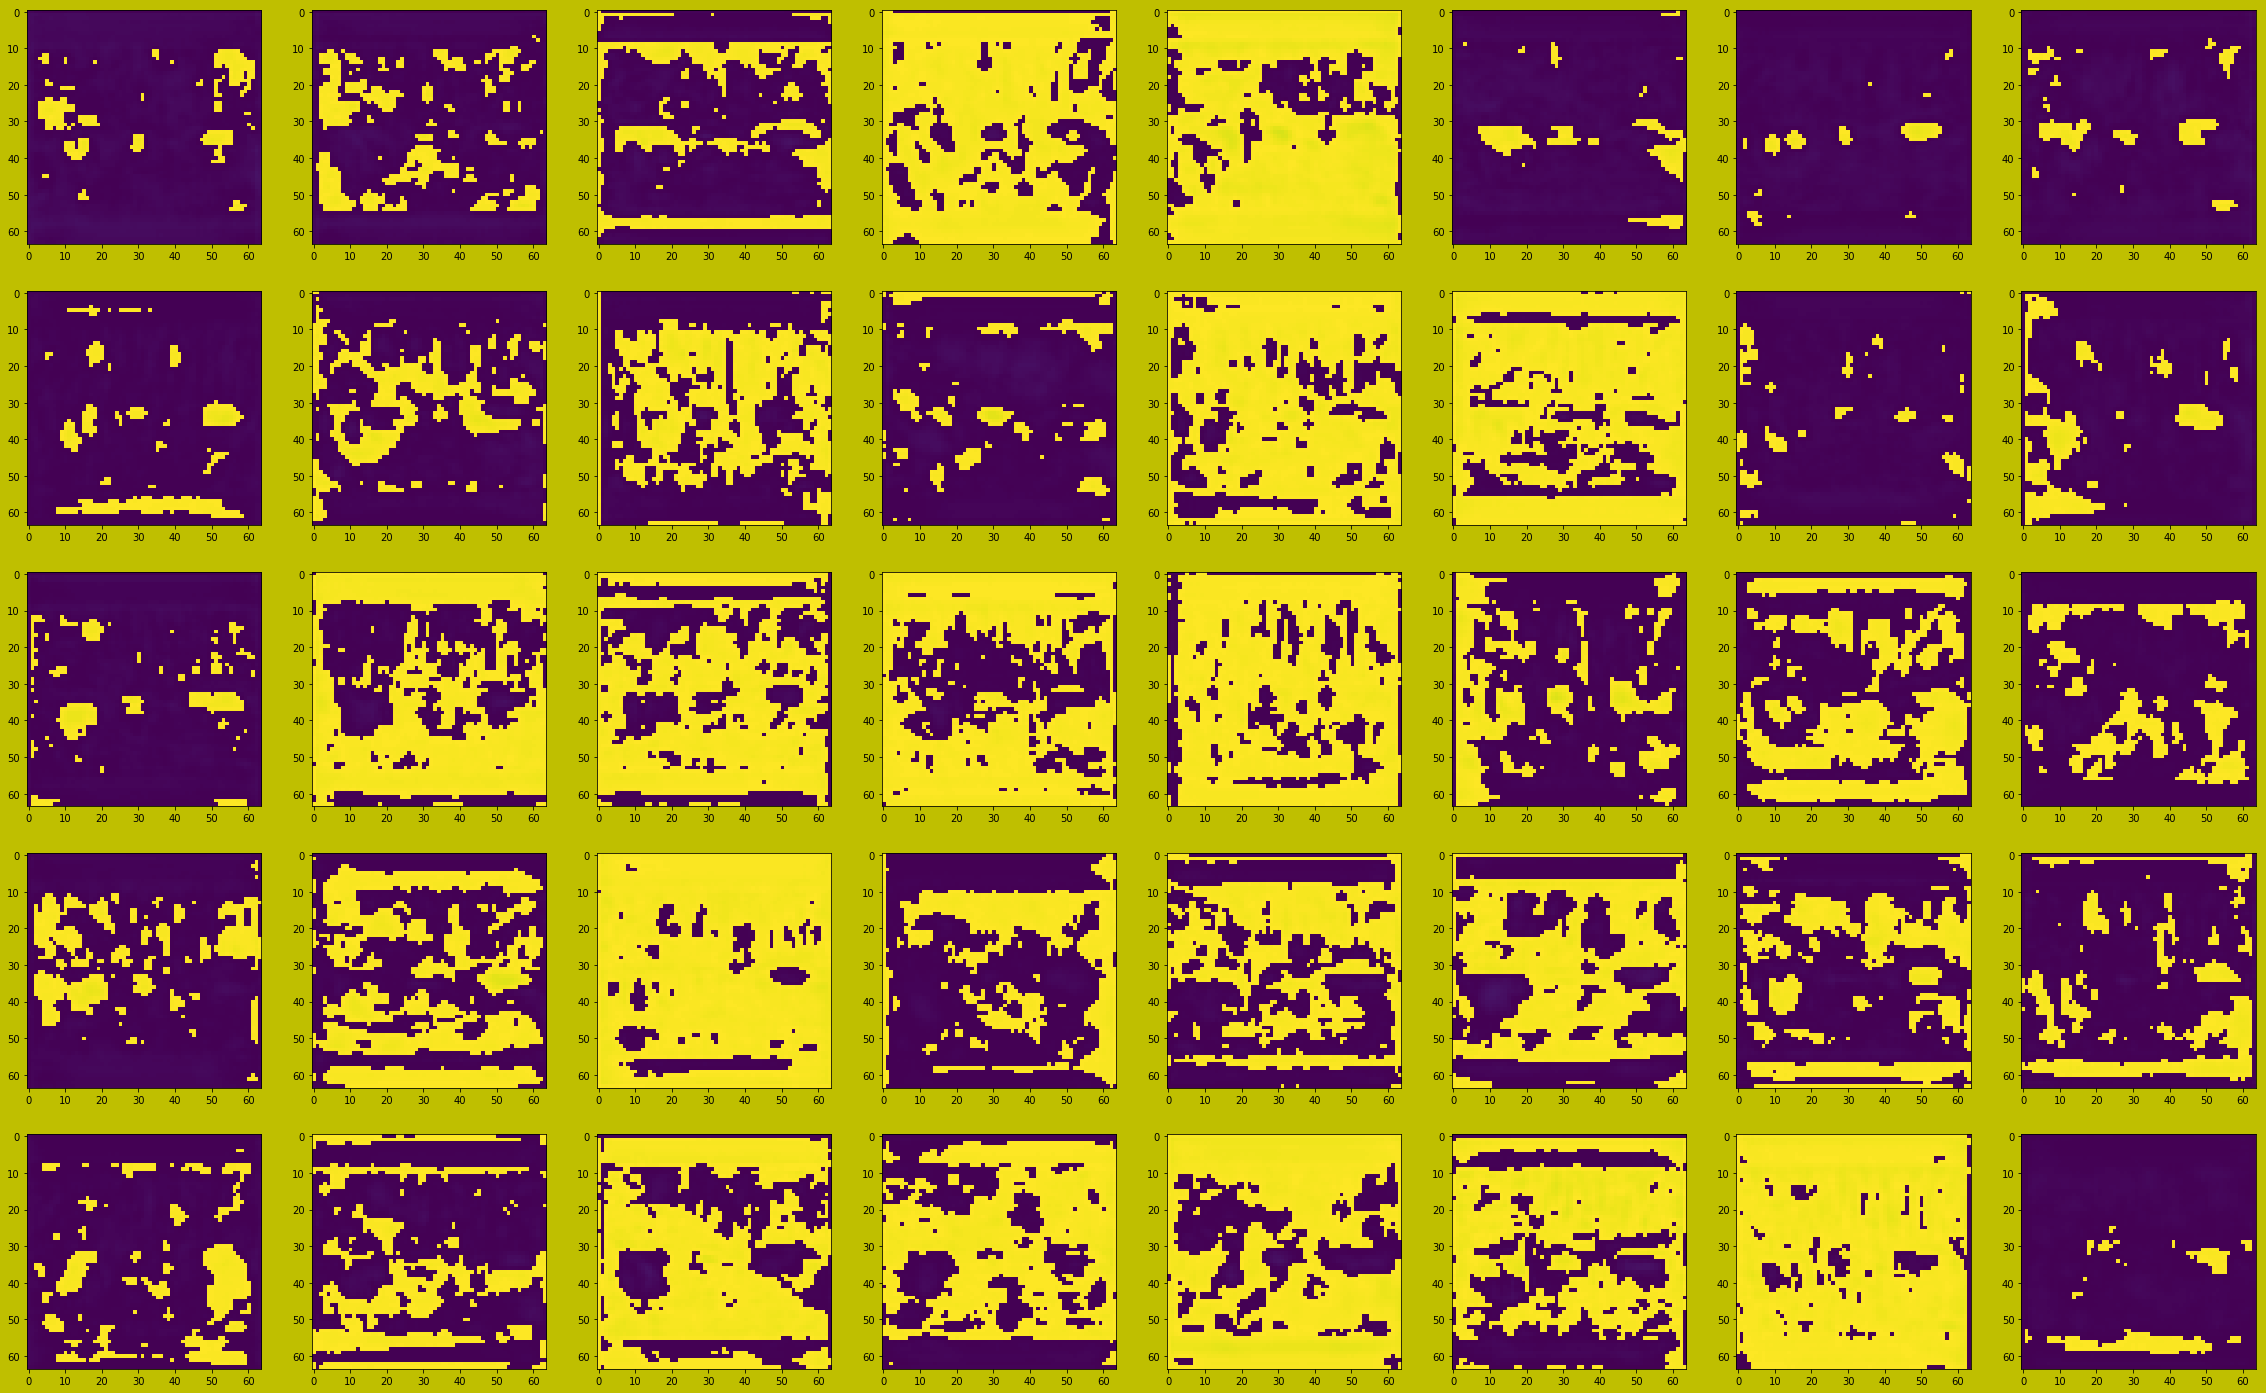

In [55]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [64, 64]
feature_maps = np.dsplit(fmap_p4[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## fmap_p5

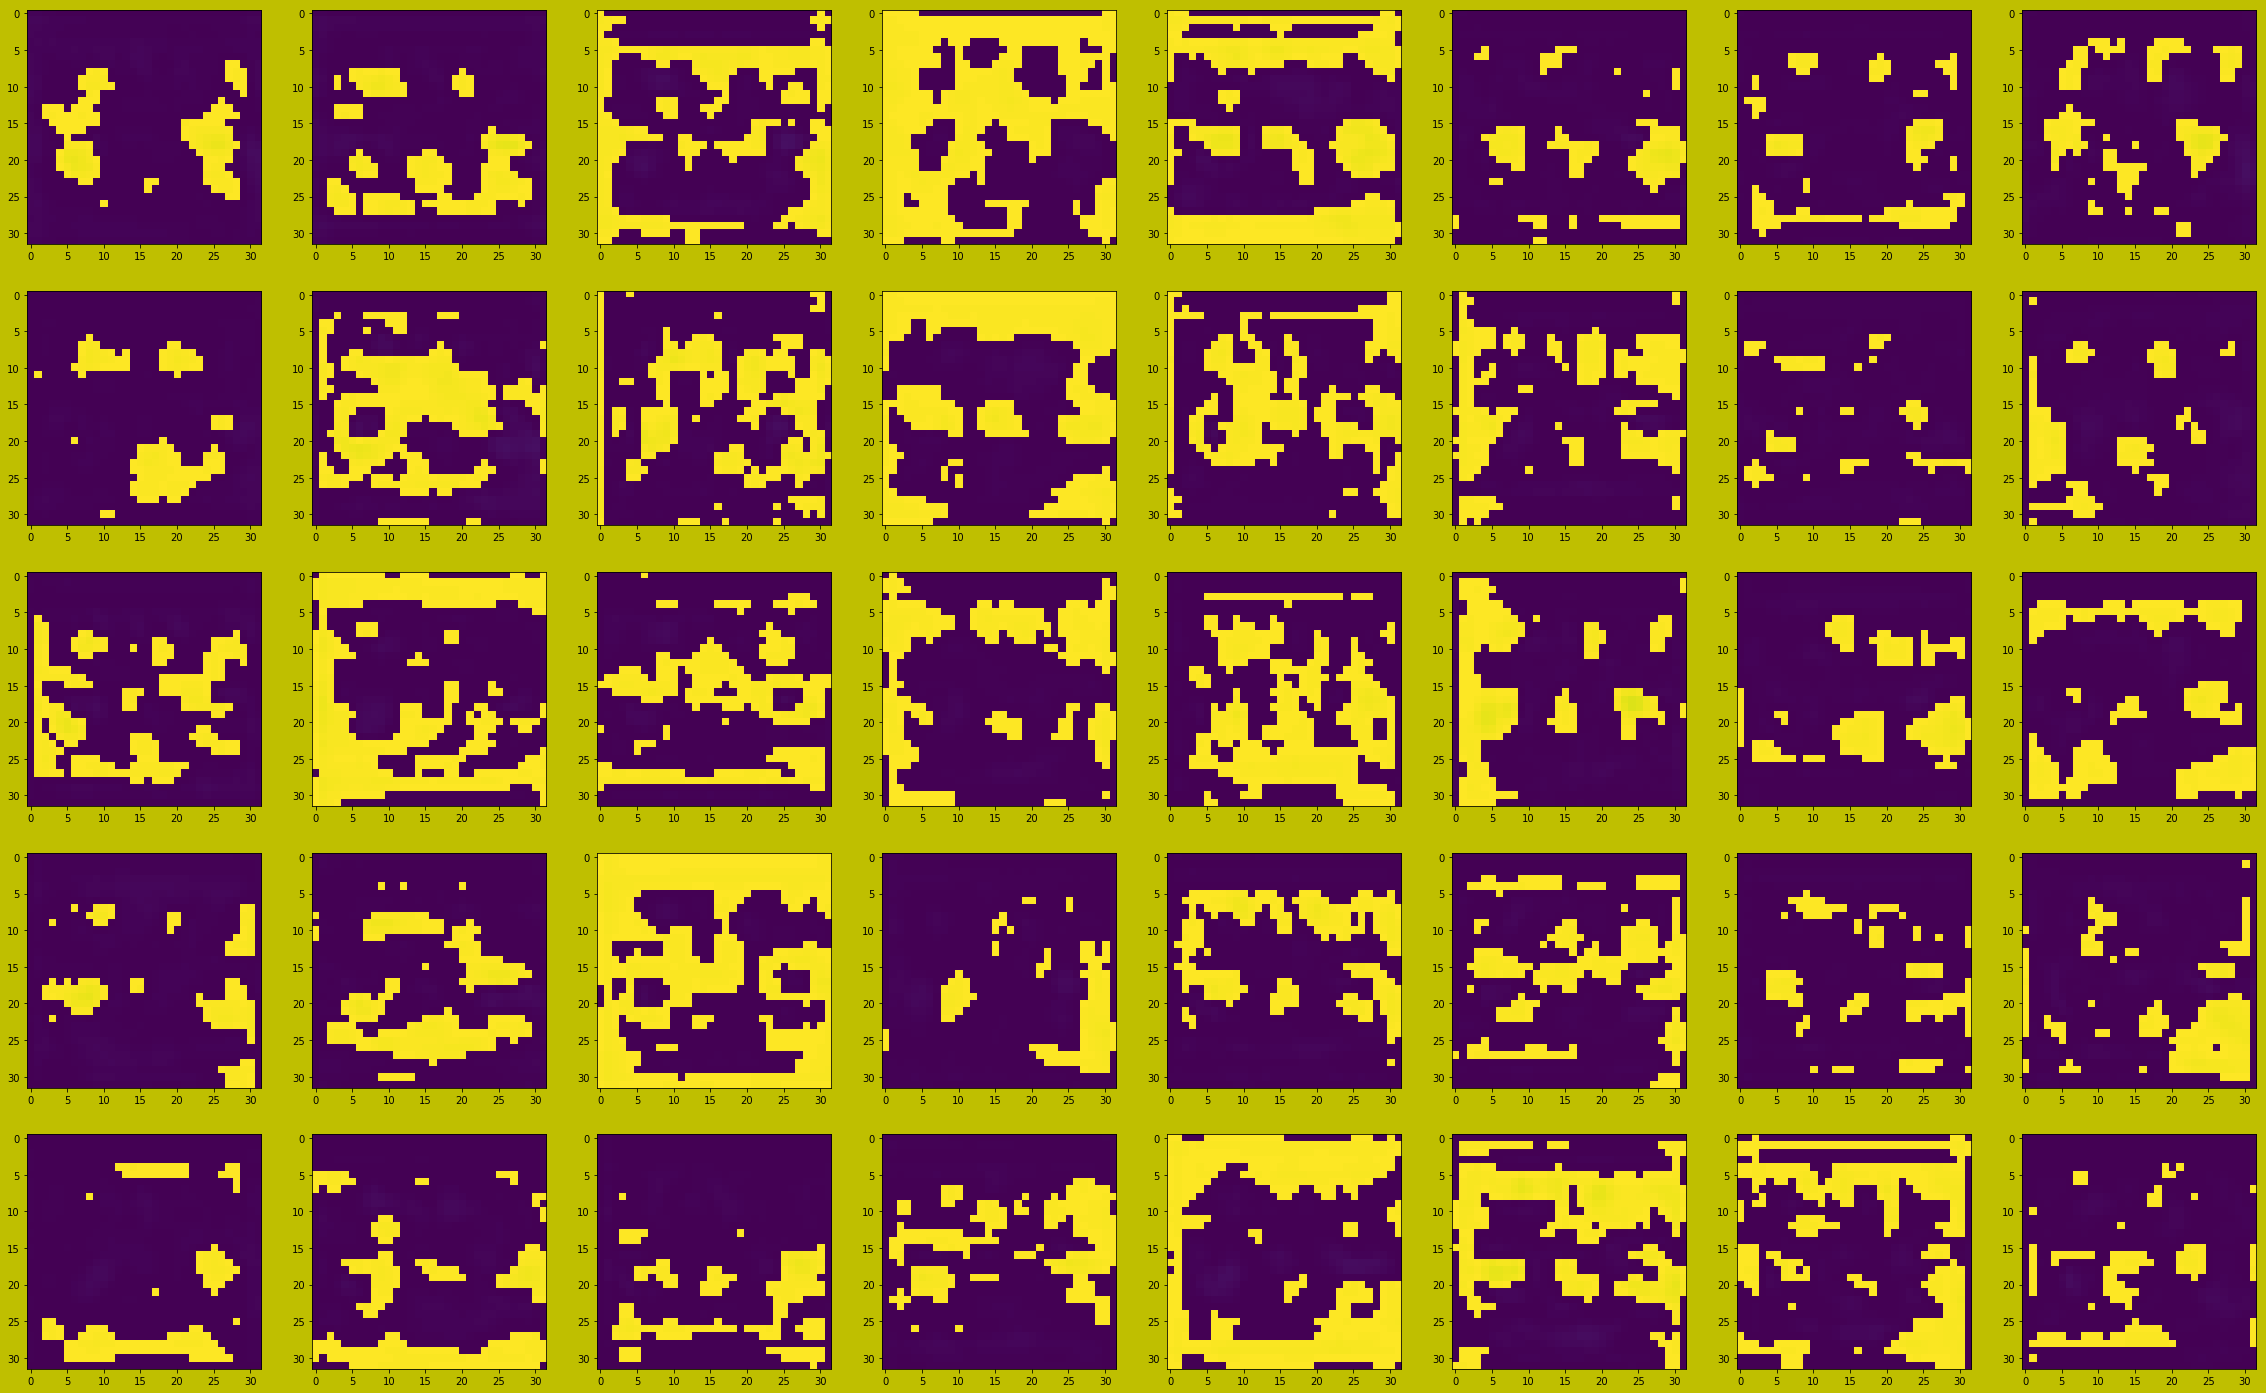

In [56]:
nrows = 5
ncols = 8
tot = nrows*ncols
from_ = 200
map_shape = [32, 32]
feature_maps = np.dsplit(fmap_p5[:,:,:,from_:from_+tot].reshape(map_shape[0], map_shape[1], tot), tot)
vizualize(feature_maps, [], data_type='uint8', rows=nrows, columns=ncols, figsize=(40, 25))

## ROUGH

In [6]:
for i in range(5, 1, -1):
    print (i)

5
4
3
2
